In [7]:
import neural_net_without_autograd as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [8]:
np.random.seed(2)

# --- defining the Franke function
def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

# --- Generating dataset
n = 100 # the square root of the number of datapoints
x, y = np.linspace(0,1,n), np.linspace(0,1,n)
x, y = np.meshgrid(x, y)
x = x.ravel()
y = y.ravel()

k = .01 # noise coefficient
z = FrankeFunction(x,y) + k*np.random.randn(n**2) # target variable with standard normal noise
z = z.reshape((len(z), 1))      # have to reshape the data to get the correct output

X = np.column_stack((x,y))

X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2, random_state=0)

### Gridsearch

In [14]:
# Define layer sizes and activations
network_input_size =  2
layer_output_sizes = [50, 1]
activations = ['sigmoid', 'identity']
k_folds = KFold(n_splits=10)

pipeline = Pipeline([
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, loss_fn='mse', batch_size=100, epochs=1000))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1]
}

grid_search = GridSearchCV(estimator=pipeline,
                param_grid=param_grid,
                scoring='neg_mean_squared_error',
                cv=k_folds,
                verbose=1,
                n_jobs=1)
gs = grid_search.fit(X_train, z_train)
print(-gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
Epoch 0: MSE = 16.269343806254685
Epoch 100: MSE = 0.3982774801571572
Epoch 200: MSE = 0.16567174898640902
Epoch 300: MSE = 0.08224217184359074
Epoch 400: MSE = 0.05119050385527538
Epoch 500: MSE = 0.03918587503792837
Epoch 600: MSE = 0.03431035751553099
Epoch 700: MSE = 0.03218277444227556
Epoch 800: MSE = 0.03114857295889208
Epoch 900: MSE = 0.030564678484296413
Epoch 0: MSE = 4.624868342918216
Epoch 100: MSE = 0.03350490288044747
Epoch 200: MSE = 0.029234236667179468
Epoch 300: MSE = 0.02763661009556944
Epoch 400: MSE = 0.0269959185634574
Epoch 500: MSE = 0.026698942500094695
Epoch 600: MSE = 0.026526121641314928
Epoch 700: MSE = 0.0263986824923758
Epoch 800: MSE = 0.02628836006735991
Epoch 900: MSE = 0.02618497428570136
Epoch 0: MSE = 0.032984189797444725
Epoch 100: MSE = 0.023980900041992253
Epoch 200: MSE = 0.022880399878583254
Epoch 300: MSE = 0.02224788934429602
Epoch 400: MSE = 0.02187797929130728
Epoch 500: MSE = 

Gridsearch checking different activation function:

In [5]:
# Define layer sizes and activations
network_input_size =  2
layer_output_sizes = [50, 1]
activations = ['sigmoid', 'identity']
k_folds = KFold(n_splits=10)

pipeline = Pipeline([
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, loss_fn='mse', batch_size=100, epochs=1000))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
    'model__activations': [['sigmoid', 'identity'], ['relu', 'identity'], ['elu', 'identity']]
}

grid_search = GridSearchCV(estimator=pipeline,
                param_grid=param_grid,
                scoring='neg_mean_squared_error',
                cv=k_folds,
                verbose=3,
                n_jobs=1)
gs = grid_search.fit(X_train, z_train)
print(-gs.best_score_)
print(gs.best_params_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Epoch 0: MSE = 2.1228779421974204
Epoch 100: MSE = 0.02127296292510378
Epoch 200: MSE = 0.021006967232360927
Epoch 300: MSE = 0.020872285425558187
Epoch 400: MSE = 0.020794450117437278
Epoch 500: MSE = 0.020742387916861133
Epoch 600: MSE = 0.020702580272890406
Epoch 700: MSE = 0.02066887470561658
Epoch 800: MSE = 0.020638369913770226
Epoch 900: MSE = 0.020609645098657235
[CV 1/10] END model__activations=['sigmoid', 'identity'], model__epsilon=0.0001, model__llambda=0;, score=-0.022 total time=   9.3s
Epoch 0: MSE = 9.775574341958922
Epoch 100: MSE = 0.2210390759743021
Epoch 200: MSE = 0.1099908936331843
Epoch 300: MSE = 0.06234541153072153
Epoch 400: MSE = 0.04162031160908556
Epoch 500: MSE = 0.03251221094637358
Epoch 600: MSE = 0.028462277332153604
Epoch 700: MSE = 0.02662766184324081
Epoch 800: MSE = 0.025767742570456477
Epoch 900: MSE = 0.02533849152846746
[CV 2/10] END model__activations=['sigmoid', 'identity'], model__

In [30]:
cv_results = grid_search.cv_results_

# Convert to a pandas DataFrame for better readability
results_df = pd.DataFrame(cv_results)

# Display the parameter combinations and their corresponding mean test scores
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

                    params  mean_test_score  std_test_score  rank_test_score
0  {'model__epsilon': 0.1}        -0.016838        0.022719                1


### Plotting the prediction and the data

In [26]:
# Define layer sizes and activations
network_input_size =  2
layer_output_sizes = [50, 1]
activations = ['sigmoid', 'identity']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, loss_fn='mse', batch_size=100, epochs=1000, epsilon=0.1))
])

pipeline.fit(X_train, z_train)

pipeline.score(X_test, z_test)

Epoch 0: MSE = 0.08968101187268324
Epoch 100: MSE = 0.006749738240504466
Epoch 200: MSE = 0.0033236965418250407
Epoch 300: MSE = 0.0021415404344366064
Epoch 400: MSE = 0.0018609226250422906
Epoch 500: MSE = 0.001731803729259822
Epoch 600: MSE = 0.0016684976184729106
Epoch 700: MSE = 0.0016169888223517284
Epoch 800: MSE = 0.0015794700377571942
Epoch 900: MSE = 0.0015342503642950076


0.001473140380716647

In [9]:
# Define layer sizes and activations
network_input_size =  2
layer_output_sizes = [50, 1]
activations = ['relu', 'identity']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', NNC.NeuralNet(network_input_size, 
                            layer_output_sizes, 
                            activations, 
                            loss_fn='mse', 
                            epsilon=0.1, 
                            batch_size=100, 
                            epochs=1000))
])

# getting data for confusion matrix
pipeline.fit(X_train, z_train)

pipeline.score(X_test, z_test)

c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: overflow encountered in matmul
  return f_raw(*args, **kwargs)
c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py:302: RuntimeWarning: invalid value encountered in multiply
  dC_dz = dC_da * activation_der(z)


Epoch 0: MSE = nan
Epoch 100: MSE = nan
Epoch 200: MSE = nan
Epoch 300: MSE = nan
Epoch 400: MSE = nan
Epoch 500: MSE = nan
Epoch 600: MSE = nan
Epoch 700: MSE = nan
Epoch 800: MSE = nan
Epoch 900: MSE = nan


nan

In [27]:
z_total = pipeline.predict(X)

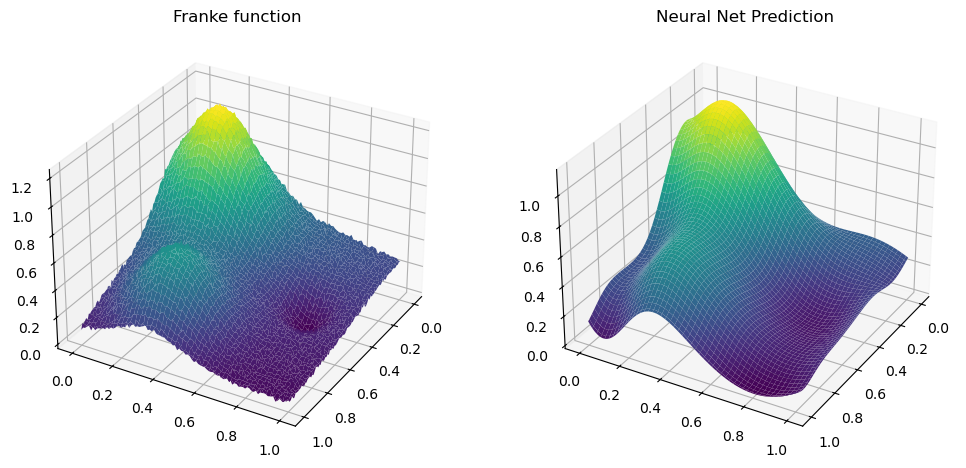

In [28]:
# Reshaping for plotting
x_plot = x.reshape((n,n))
y_plot = y.reshape((n,n))
z_plot = z_total.reshape((n,n))
z_orig_plot = z.reshape((n,n))

fig = plt.figure(figsize=(12, 6))

# Plotting the datapoints
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(x_plot, y_plot, z_orig_plot, cmap='viridis', edgecolor='none')
ax.set_title('Franke function')
ax.view_init(azim=30)

# Plot the polynomial regression prediction 
ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(x_plot, y_plot, z_plot, cmap='viridis', edgecolor='none')
ax.set_title('Neural Net Prediction')
ax.view_init(azim=30)

plt.show()